기본 순환층은 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석됨
따라서 멀리 떨어진 정보를 인식하는데 어려움이 있음

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [2]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1


2023-02-02 11:54:07.708543: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-02 11:54:07.708699: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2023-02-02 11:55:42.587376: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-02 11:55:43.043529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 11:55:43.465132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 11:55:45.313443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5346

2023-02-02 11:55:57.866549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 11:55:57.910845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 17s 42ms/step - loss: 0.6926 - accuracy: 0.5346 - val_loss: 0.6918 - val_accuracy: 0.5918
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6906 - accuracy: 0.6049 - val_loss: 0.6893 - val_accuracy: 0.6334
Epoch 3/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6866 - accuracy: 0.6491 - val_loss: 0.6834 - val_accuracy: 0.6558
Epoch 4/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6763 - accuracy: 0.6701 - val_loss: 0.6655 - val_accuracy: 0.6772
Epoch 5/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6325 - accuracy: 0.7047 - val_loss: 0.5965 - val_accuracy: 0.7268
Epoch 6/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5818 - accuracy: 0.7416 - val_loss: 0.5754 - val_accuracy: 0.7328
Epoch 7/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5584 - accuracy: 0.7523 - val_loss: 0.5537 - val_accuracy: 0.74

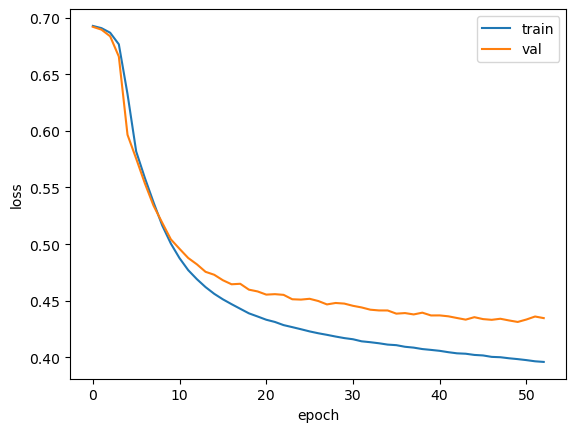

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2023-02-02 12:19:35.757885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 12:19:36.082800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 12:19:36.315512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5299

2023-02-02 12:19:48.017623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 12:19:48.066472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 14s 41ms/step - loss: 0.6925 - accuracy: 0.5299 - val_loss: 0.6913 - val_accuracy: 0.5736
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6898 - accuracy: 0.5929 - val_loss: 0.6875 - val_accuracy: 0.6332
Epoch 3/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6800 - accuracy: 0.6329 - val_loss: 0.6659 - val_accuracy: 0.6310
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6298 - accuracy: 0.6865 - val_loss: 0.6088 - val_accuracy: 0.7080
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5917 - accuracy: 0.7236 - val_loss: 0.5806 - val_accuracy: 0.7364
Epoch 6/100
313/313 [==============================] - 12s 40ms/step - loss: 0.5680 - accuracy: 0.7434 - val_loss: 0.5611 - val_accuracy: 0.7374
Epoch 7/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5438 - accuracy: 0.7594 - val_loss: 0.5368 - val_accuracy: 0.75

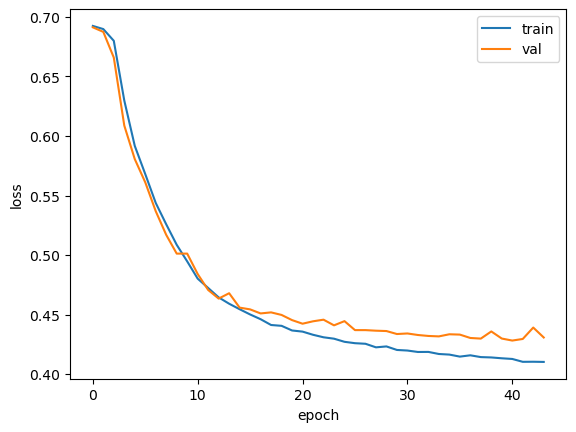

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2023-02-02 14:44:40.890004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 14:44:41.107783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 14:44:41.298478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 14:44:41.622414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 14:44:42.000618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5366

2023-02-02 14:45:01.544575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 14:45:01.613135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 14:45:01.786335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 24s 70ms/step - loss: 0.6924 - accuracy: 0.5366 - val_loss: 0.6916 - val_accuracy: 0.5468
Epoch 2/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6889 - accuracy: 0.5904 - val_loss: 0.6854 - val_accuracy: 0.6380
Epoch 3/100
313/313 [==============================] - 18s 58ms/step - loss: 0.6740 - accuracy: 0.6531 - val_loss: 0.6572 - val_accuracy: 0.6662
Epoch 4/100
313/313 [==============================] - 18s 59ms/step - loss: 0.6082 - accuracy: 0.6933 - val_loss: 0.5641 - val_accuracy: 0.7134
Epoch 5/100
313/313 [==============================] - 18s 58ms/step - loss: 0.5417 - accuracy: 0.7340 - val_loss: 0.5229 - val_accuracy: 0.7396
Epoch 6/100
313/313 [==============================] - 18s 59ms/step - loss: 0.5144 - accuracy: 0.7512 - val_loss: 0.5004 - val_accuracy: 0.7576
Epoch 7/100
313/313 [==============================] - 19s 59ms/step - loss: 0.4964 - accuracy: 0.7626 - val_loss: 0.4867 - val_accuracy: 0.77

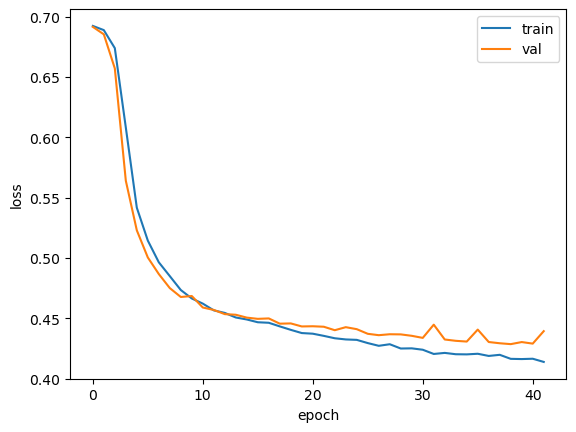

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [17]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2023-02-02 15:03:21.361131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 15:03:21.515781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 15:03:22.229416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5110

2023-02-02 15:03:35.604932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 15:03:35.656155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 17s 45ms/step - loss: 0.6930 - accuracy: 0.5110 - val_loss: 0.6926 - val_accuracy: 0.5268
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6926 - accuracy: 0.5262 - val_loss: 0.6922 - val_accuracy: 0.5510
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6922 - accuracy: 0.5393 - val_loss: 0.6916 - val_accuracy: 0.5586
Epoch 4/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6916 - accuracy: 0.5459 - val_loss: 0.6908 - val_accuracy: 0.5692
Epoch 5/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6907 - accuracy: 0.5575 - val_loss: 0.6897 - val_accuracy: 0.5760
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6893 - accuracy: 0.5657 - val_loss: 0.6878 - val_accuracy: 0.5806
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6870 - accuracy: 0.5772 - val_loss: 0.6850 - val_accuracy: 0.58

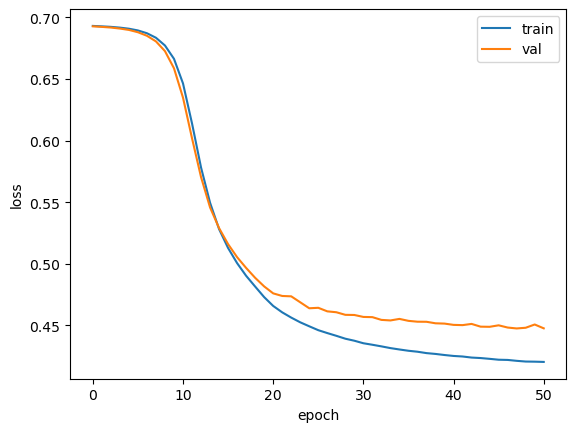

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()